In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [11]:
# Load the dataset
df = pd.read_csv("C:\\Users\\Anshula Sridhar\\Downloads\\archive (5)\\Churn_Modelling.csv")

# Display the first few rows of the data
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# Check for missing values
df.isnull().sum()

# Drop irrelevant columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Check data types
df.dtypes


CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [13]:
# One-hot encoding for categorical features (Geography and Gender)
df = pd.get_dummies(df, drop_first=True)


In [14]:
# Define features and target
X = df.drop('Exited', axis=1)  # 'Exited' is the target variable
y = df['Exited']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
# Train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions and evaluation
y_pred_logreg = logreg.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.811
[[1543   64]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [17]:
# Train the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.867
[[1545   62]
 [ 204  189]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000



In [18]:
# Train the model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Predictions and evaluation
y_pred_gb = gb.predict(X_test)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gb)}")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.8675
[[1543   64]
 [ 201  192]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [19]:
# Compare the models
models = {
    'Logistic Regression': accuracy_score(y_test, y_pred_logreg),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Gradient Boosting': accuracy_score(y_test, y_pred_gb)
}

# Display comparison
for model, accuracy in models.items():
    print(f'{model} Accuracy: {accuracy}')


Logistic Regression Accuracy: 0.811
Random Forest Accuracy: 0.867
Gradient Boosting Accuracy: 0.8675


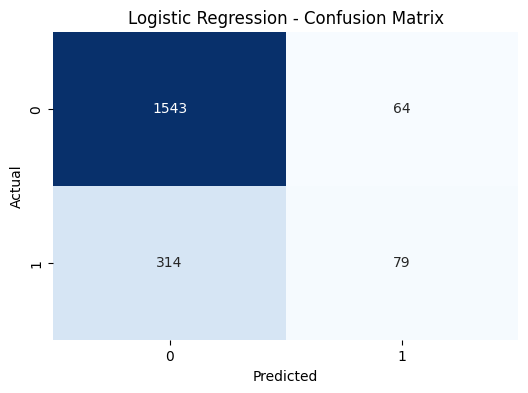

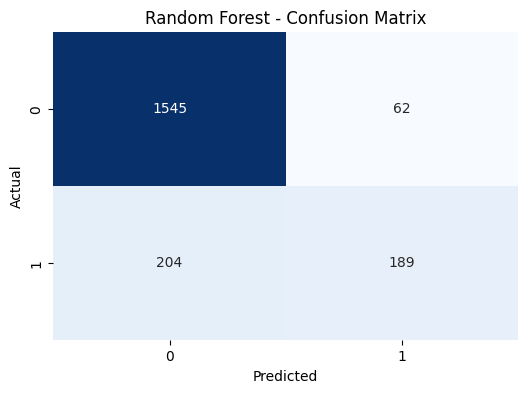

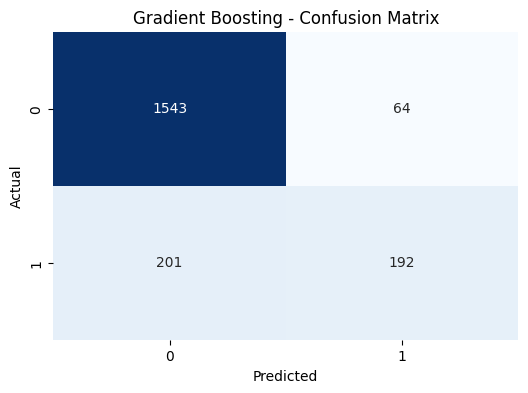

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion matrix for Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


C:\Users\Anshula Sridhar\AppData\Local\Temp\ipykernel_21832\360401968.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


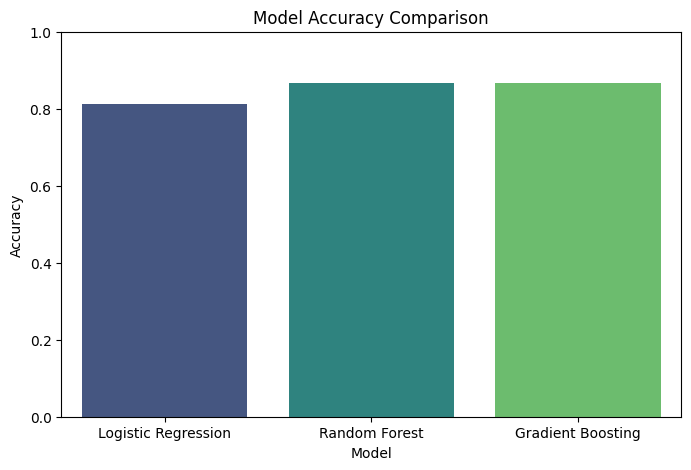

In [21]:
# Accuracy comparison plot
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracies = [accuracy_score(y_test, y_pred_logreg),
              accuracy_score(y_test, y_pred_rf),
              accuracy_score(y_test, y_pred_gb)]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


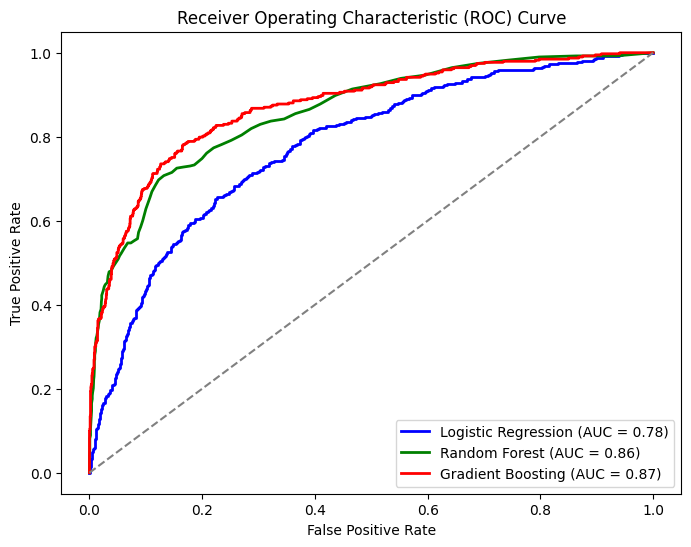

In [22]:
from sklearn.metrics import roc_curve, auc

# Logistic Regression ROC Curve
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Random Forest ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Gradient Boosting ROC Curve
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb.predict_proba(X_test)[:, 1])
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_logreg))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot(fpr_gb, tpr_gb, color='red', lw=2, label='Gradient Boosting (AUC = {:.2f})'.format(roc_auc_gb))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


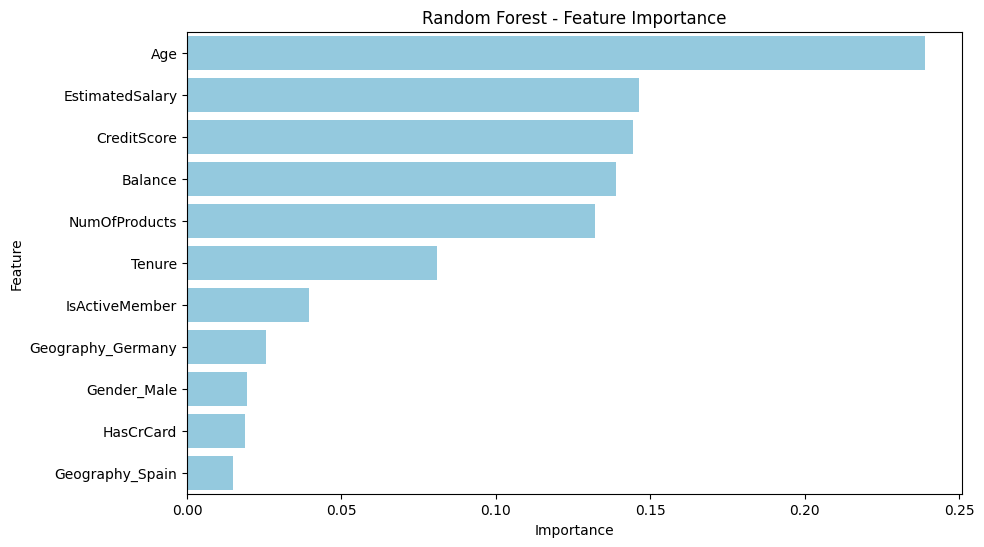

C:\Users\Anshula Sridhar\AppData\Local\Temp\ipykernel_21832\2591709623.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_rf, palette='viridis')


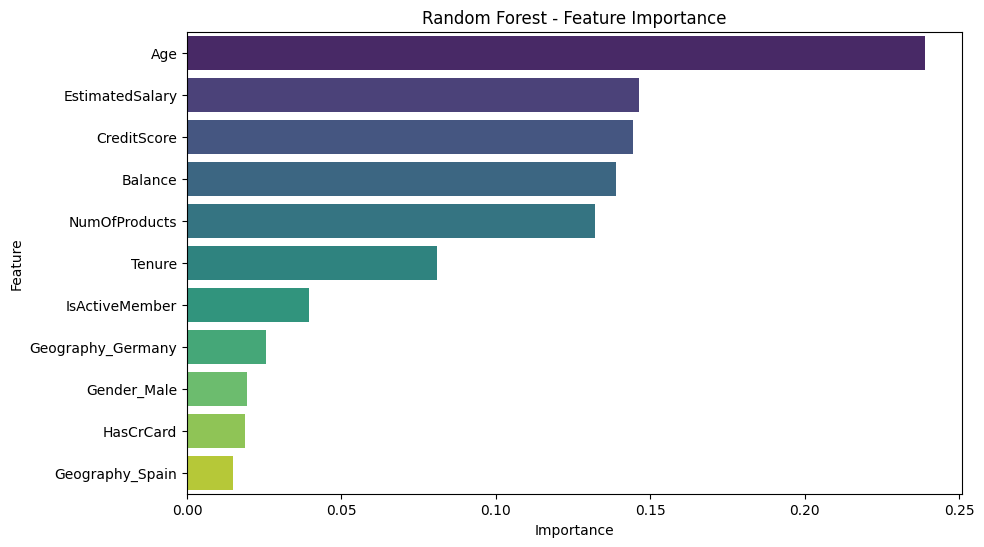

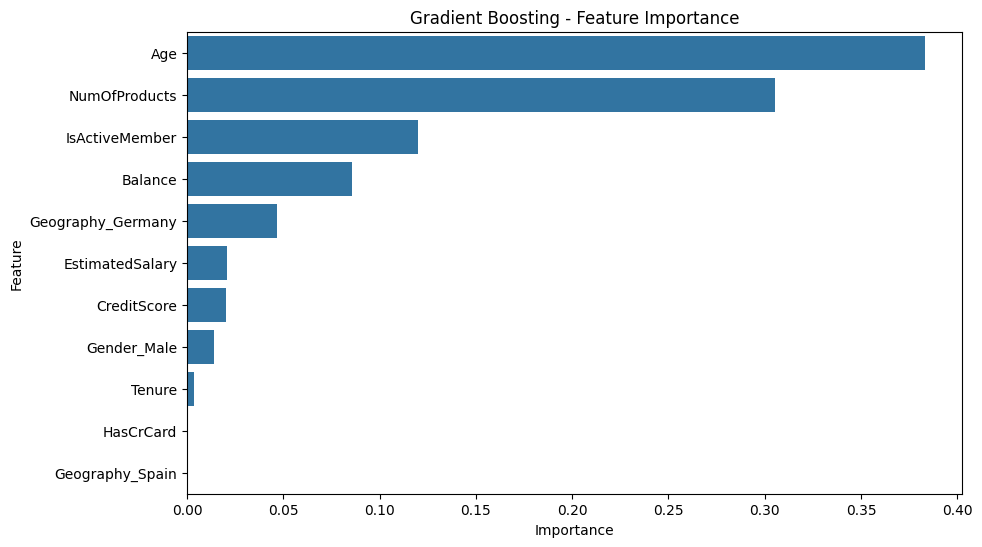

C:\Users\Anshula Sridhar\AppData\Local\Temp\ipykernel_21832\2591709623.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_gb, palette='viridis')


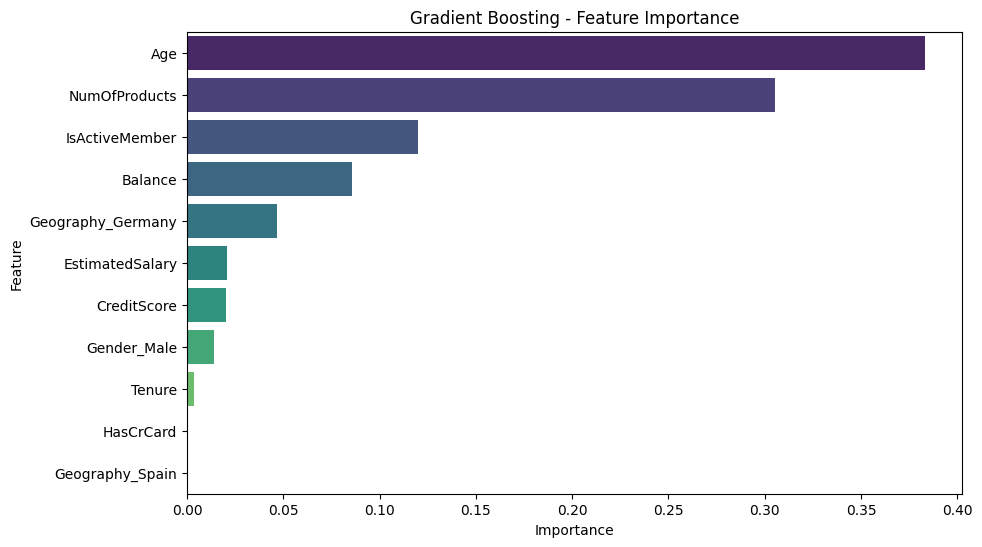

In [28]:
# Feature importance for Random Forest
plt.figure(figsize=(10, 6))

sns.barplot(x='Importance', y='Feature', data=importance_df_rf, color='skyblue')

plt.title('Random Forest - Feature Importance')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_rf, palette='viridis')
plt.title('Random Forest - Feature Importance')
plt.show()

# Feature importance for Gradient Boosting
# Gradient Boosting Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_gb)
plt.title('Gradient Boosting - Feature Importance')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_gb, palette='viridis')
plt.title('Gradient Boosting - Feature Importance')
plt.show()


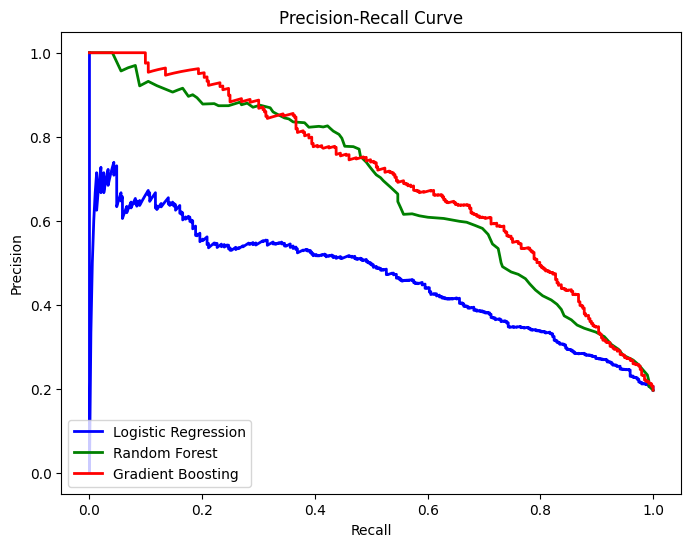

In [24]:
from sklearn.metrics import precision_recall_curve

# Logistic Regression Precision-Recall Curve
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:, 1])

# Random Forest Precision-Recall Curve
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

# Gradient Boosting Precision-Recall Curve
precision_gb, recall_gb, _ = precision_recall_curve(y_test, gb.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_logreg, precision_logreg, color='blue', lw=2, label='Logistic Regression')
plt.plot(recall_rf, precision_rf, color='green', lw=2, label='Random Forest')
plt.plot(recall_gb, precision_gb, color='red', lw=2, label='Gradient Boosting')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.show()
